In [7]:
# Load packages for plotting
using Gadfly, Interact;

#  Colors based on Color Brewer 3class Set 1
blue = colorant"#377eb8"; #dark blue
lblue = colorant"#9ecae1"; #light blue
red  = colorant"#e41a1c"; 

In [8]:
function stem(x,y,properties)
    pl= plot(y=y, x=x,Coord.Cartesian(xmin=-n,xmax=n, ymax=maximum(y)),properties...); 
    for k in 1:length(x); 
        push!(pl,layer(x=[x[k],x[k]], y=[0,y[k]], Geom.line,Theme(line_width=2pt,default_color=blue))); 
    end
    return pl
end;

Define a square wave with the property $T=kT_p, k\in \mathbb{Z}$ over the interval $-\frac{T}{2}<t \leq\frac{T}{2}$

$$ \text{squareWave}(t) = \begin{cases} 1 & \text{if  $|t|\leq \frac{T_p}{2} $} \\ 0 & \text{if $ |t|>\frac{T_p}{2}$} \end{cases}$$

In [9]:
Tₚ=1 #time on
x_sq(t,T)= (abs(t)%(T))<=(Tₚ/2) || (abs(t)%(T))>=(T-Tₚ/2) ?1:0;

The coefficients:
$$
\alpha_n = \frac{T_p}{T} \textrm{sinc} \bigg(n \frac{T_p}{T} \bigg)
$$
Where
$$
\textrm{sinc}(x)=\frac{sin (\pi x)} {\pi x}
$$

In [10]:
αₙ(x,T) = Tₚ/T*sinc(x);

In [11]:
n=5; #plot range
sq_properties=Guide.ylabel("SquareWave"), Guide.xlabel("Time"), 
    Theme(line_width=2pt, default_color=blue), Coord.Cartesian(ymax=1,ymin=0);

stem_properties = Geom.point, Guide.ylabel("|α|T"), Guide.xlabel("Frequency(1/T)"), 
Theme(default_point_size=3pt,default_color=blue), Guide.xticks(ticks=collect(-n:n));

set_default_plot_size(20cm, 12cm);

Interact.Slider{Int64}([Reactive.Input{Int64}] 5,"T",5,2:1:30)

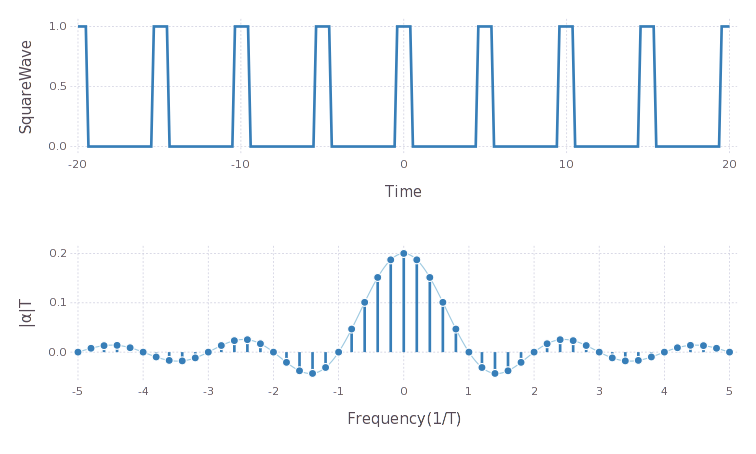

In [12]:
@manipulate for T in slider(2:1:30, value=5, label="T")
    x=-(1/Tₚ)*n:(1/T):(1/Tₚ)*n; y= αₙ(x,T);
    pl=stem(x,y,stem_properties);
    plfreq=push!(pl,layer(t->αₙ(t,T),-n,n,Theme(default_color=lblue)))
    pltime=plot(t->x_sq(t,T),-20,20, sq_properties...)
    vstack(pltime,plfreq);
end